In [5]:
import unittest
import os
import pandas as pd
from video_quality_map import merge_data

class TestMergeData(unittest.TestCase):
    def setUp(self):
        self.feature_path = "/Users/khanhha/mpt-statistical-testing/MPTData/feature_data"
        self.msd_path = "/Users/khanhha/mpt-statistical-testing/MPTData/msd_data"
        self.json_path = "/Users/khanhha/mpt-statistical-testing/MPTData/15_models_10_percent.json"

    # Pass
    def test_basic_functionality(self):
        df, msd_data, quality_data = merge_data(self.feature_path, self.msd_path, self.json_path)
        self.assertIsInstance(df, dict)
        self.assertIsInstance(msd_data, dict)
        self.assertIsInstance(quality_data, dict)
    
    # Pass
    def test_input_validation(self):
        # Test with invalid paths
        with self.assertRaises(Exception):
            merge_data("invalid/path", self.msd_path, self.json_path)
            merge_data(self.feature_path, "invalid/path", self.json_path)
            merge_data(self.feature_path, self.msd_path, "invalid/path")

    # Pass
    def test_data_integrity(self):
        df, _, _ = merge_data(self.feature_path, self.msd_path, self.json_path)
        # Number of columns = 45
        for key in df.keys():
            self.assertEqual(df[key].shape[1], 45)

    # Pass
    def test_corner_cases(self):
        # Test with empty directories
        with self.assertRaises(Exception):
            merge_data("empty/feature/directory", self.msd_path, self.json_path)
            merge_data(self.feature_path, "empty/msd/directory", self.json_path)

    # Fail
    def test_expected_columns(self):
        df, _, _ = merge_data(self.feature_path, self.msd_path, self.json_path)
        expected_columns = ['Unnamed: 0', 'Frame', 'Gauss', 'MSDs', 'Mean_Intensity', 'Quality_x',
                            'SN_Ratio', 'Track_ID', 'X', 'Y', 'alpha', 'D_fit', 'kurtosis',
                            'asymmetry1', 'asymmetry2', 'asymmetry3', 'AR', 'elongation',
                            'boundedness', 'fractal_dim', 'trappedness', 'efficiency',
                            'straightness', 'MSD_ratio', 'Deff1', 'Deff2', 'Mean alpha',
                            'Mean D_fit', 'Mean kurtosis', 'Mean asymmetry1', 'Mean asymmetry2',
                            'Mean asymmetry3', 'Mean AR', 'Mean elongation', 'Mean boundedness',
                            'Mean fractal_dim', 'Mean trappedness', 'Mean efficiency',
                            'Mean straightness', 'Mean MSD_ratio', 'Mean Deff1', 'Mean Deff2',
                            'frames', 'Quality_y', 'Category']  # List of expected columns
        for key in df.keys():    
            self.assertCountEqual(list(df[key].columns), expected_columns)


# if __name__ == '__main__':
#     unittest.main()

suite = unittest.TestLoader().loadTestsFromTestCase(TestMergeData)
_ = unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 964.759s

OK


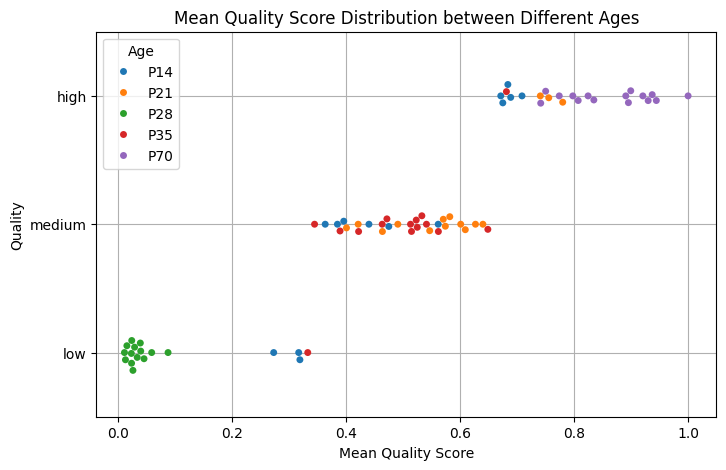

.

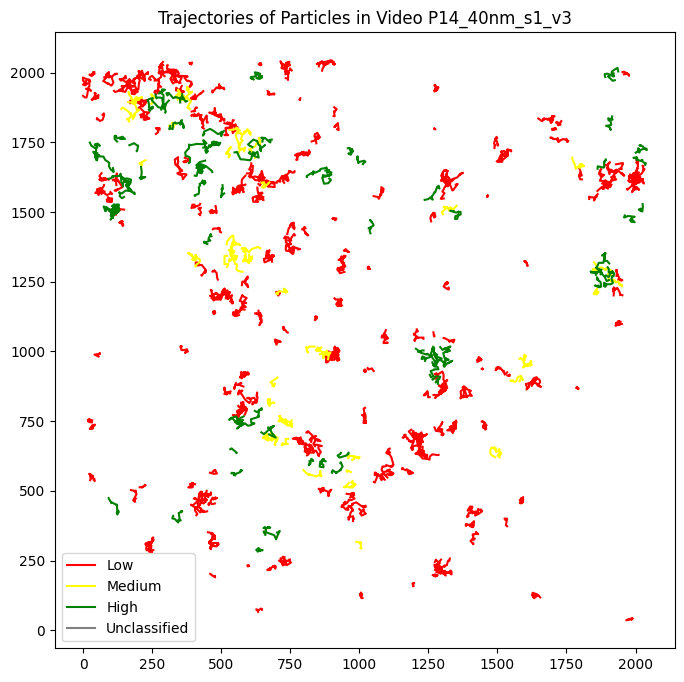

.

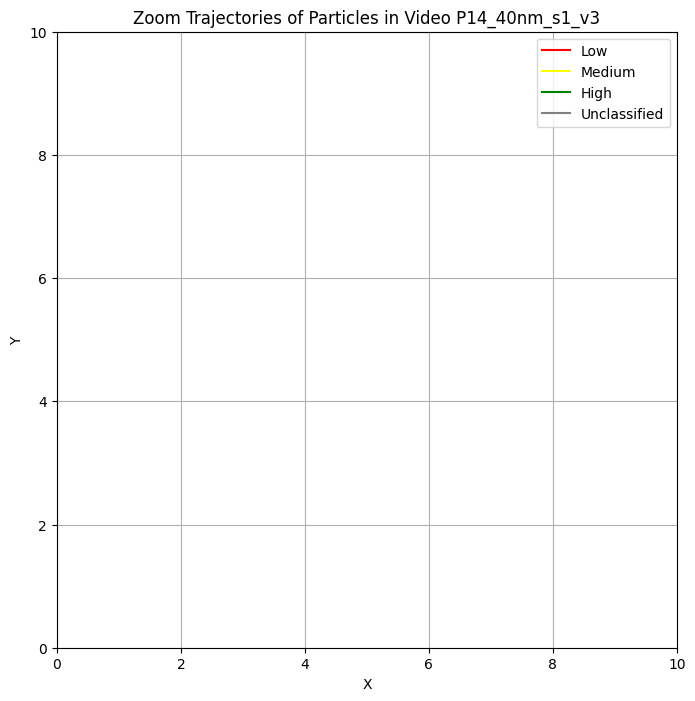

.
----------------------------------------------------------------------
Ran 3 tests in 992.238s

OK


In [7]:
import unittest
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from video_quality_map import merge_data, trajectory_plot, zoom_trajectory_plot, distruibution_by_age

class TestPlotFunctions(unittest.TestCase):
    def setUp(self):
        self.feature_path = "/Users/khanhha/mpt-statistical-testing/MPTData/feature_data"
        self.msd_path = "/Users/khanhha/mpt-statistical-testing/MPTData/msd_data"
        self.json_path = "/Users/khanhha/mpt-statistical-testing/MPTData/15_models_10_percent.json"

    def test_trajectory_plot(self):
        merge_df, _, _ = merge_data(self.feature_path, self.msd_path, self.json_path)
        vid_code = 'P14_40nm_s1_v3'  # Change this to an actual video code
        trajectory_plot(merge_df, vid_code)

    def test_zoom_trajectory_plot(self):
        merge_df, _, _ = merge_data(self.feature_path, self.msd_path, self.json_path)
        vid_code = 'P14_40nm_s1_v3'  # Change this to an actual video code
        x1, x2, y1, y2 = 0, 10, 0, 10  # Change these to the actual coordinates
        zoom_trajectory_plot(merge_df, vid_code, x1, x2, y1, y2)

    def test_distruibution_by_age(self):
        _, _, quality_data = merge_data(self.feature_path, self.msd_path, self.json_path)
        distruibution_by_age(self.feature_path, self.msd_path, quality_data)

# if __name__ == '__main__':
#     unittest.main()

suite = unittest.TestLoader().loadTestsFromTestCase(TestPlotFunctions)
_ = unittest.TextTestRunner().run(suite)